#Without Regularization

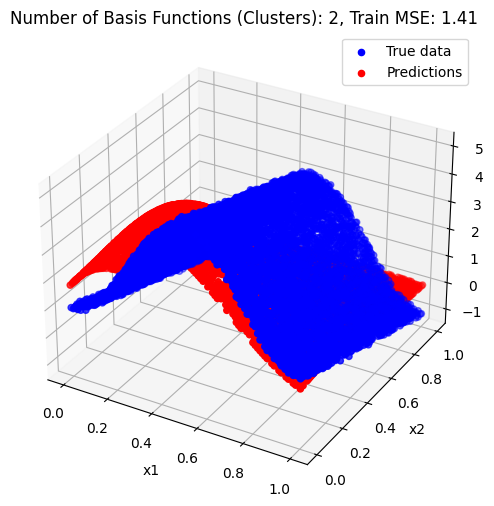

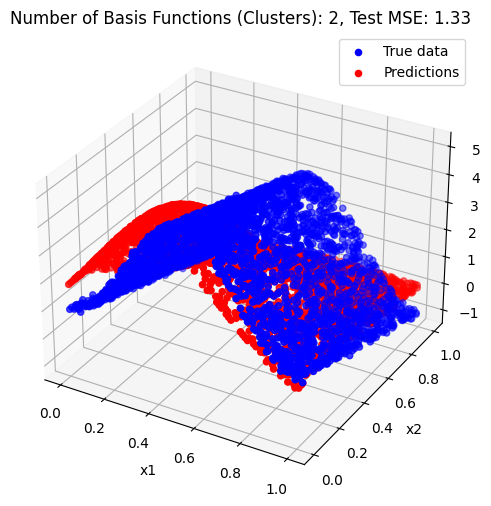

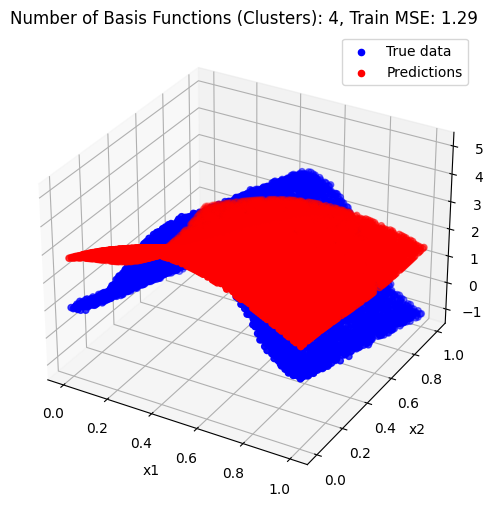

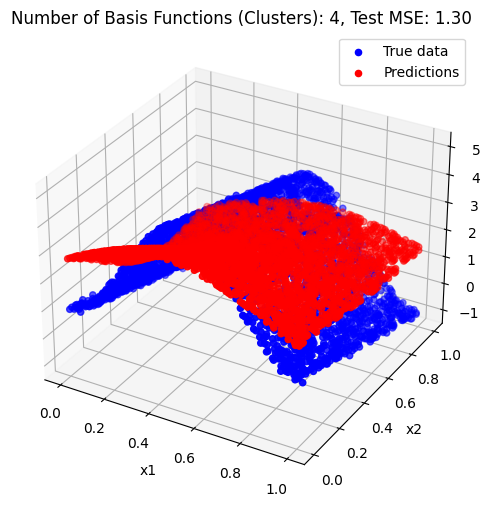

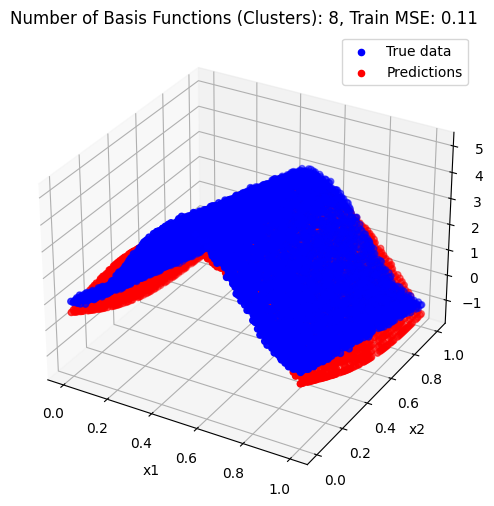

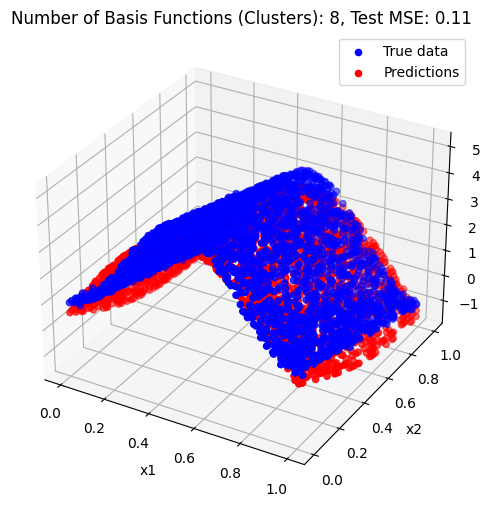

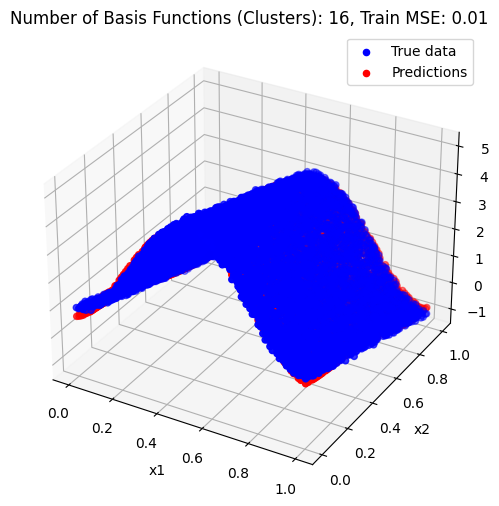

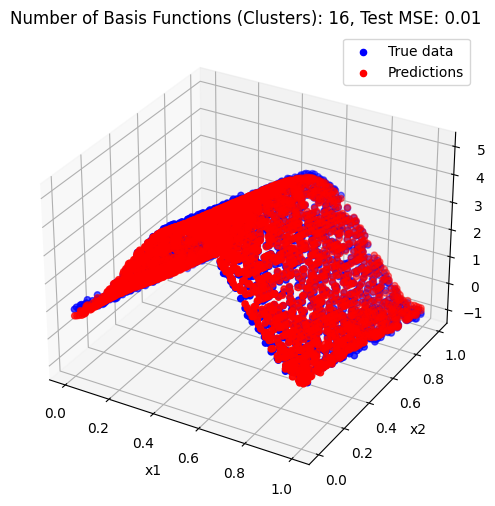

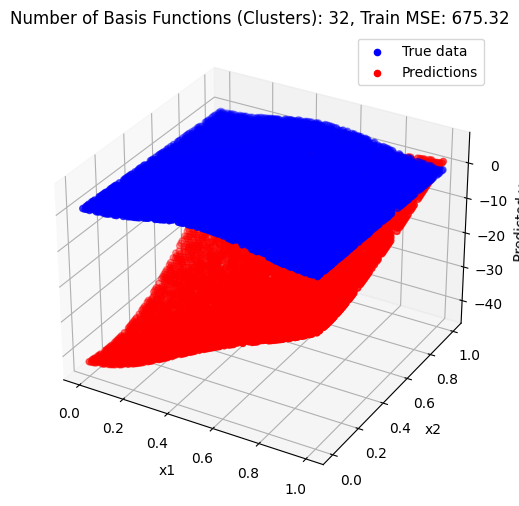

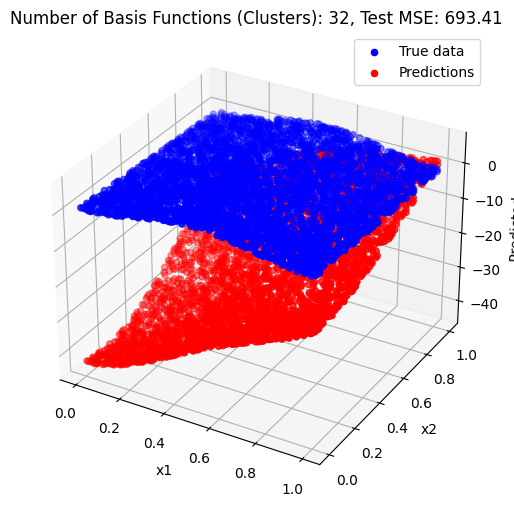

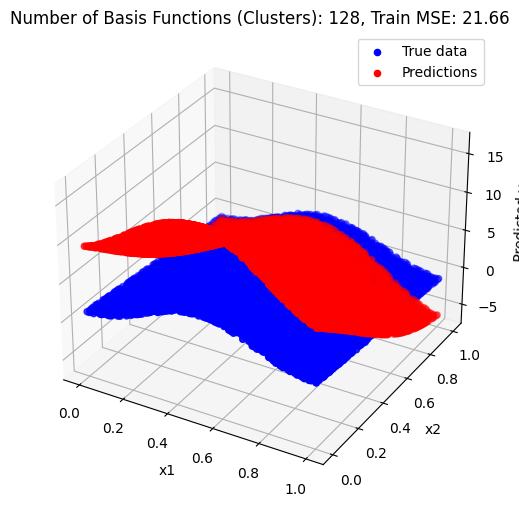

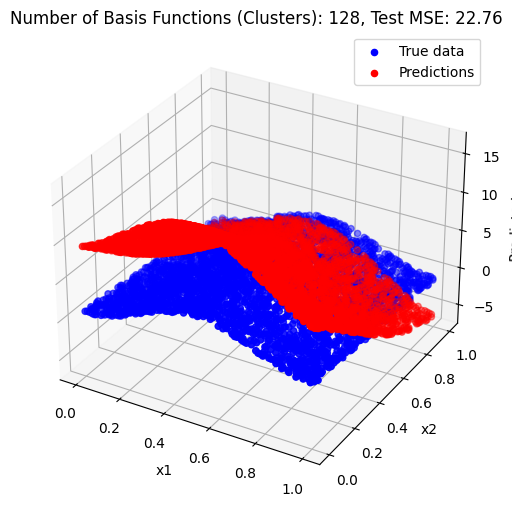

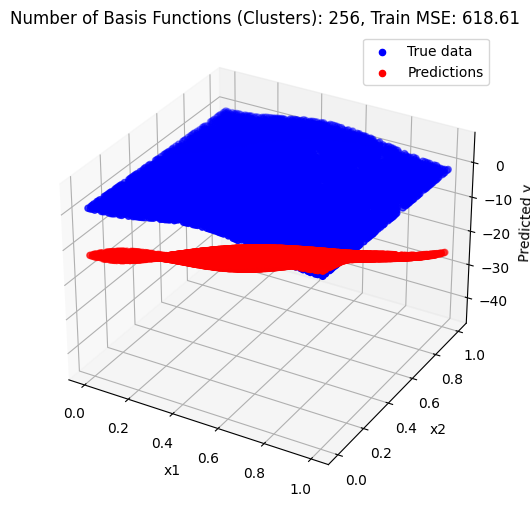

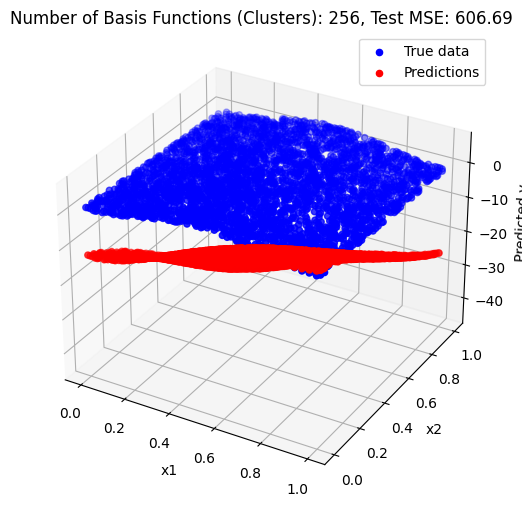

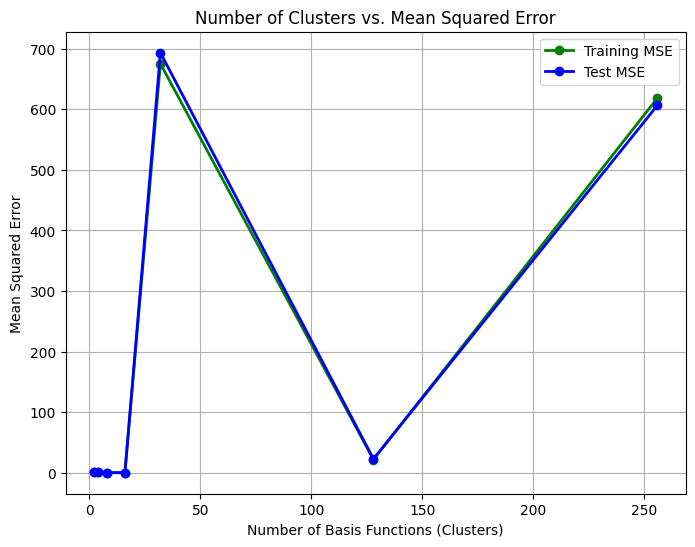

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
complexity_values = [2, 4, 8, 16, 32,64, 128, 256]

def kmeans_clustering(X, num_clusters):
    # Randomly initialize cluster centers
    np.random.seed(0)
    cluster_centers = X[np.random.choice(X.shape[0], num_clusters, replace=False)]

    # Assign data points to clusters
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_centers, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_centers, cluster_assignments

def gaussian_basis_functions(X, centers, width=1):
    return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

mse_train_values = []
mse_test_values = []

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    np.random.seed(0)  # Set seed for reproducibility
    indices = np.random.permutation(len(x_data))
    train_indices = indices[:int(0.7 * len(x_data))]
    test_indices = indices[int(0.7 * len(x_data)):]

    X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
    y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

    # Calculate the farthest distance between cluster centers
    farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

    # Calculate width as (farthest distance / sqrt(2))
    width = np.sqrt(farthest_distance) / np.sqrt(2)

    # Compute Gaussian basis functions for training data with the calculated width
    phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

    # Train linear regression model (closed-form solution)
    phi_train_transpose = np.transpose(phi_train)
    weights = np.linalg.inv(phi_train_transpose @ phi_train) @ (phi_train_transpose @ y_train)

    # Compute Gaussian basis functions for test data with the same width
    phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

    # Make predictions for training and test data
    predictions_train = phi_train @ weights
    predictions_test = phi_test @ weights

    # Calculate mean squared error for training and test data
    mse_train = np.mean((y_train - predictions_train) ** 2)
    mse_test = np.mean((y_test - predictions_test) ** 2)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Plot the 3D approximated function for training data
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
    ax.scatter(X_train[:, 0], X_train[:, 1], predictions_train, color='red', label='Predictions')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    ax.set_title(f'Number of Basis Functions (Clusters): {num_clusters}, Train MSE: {mse_train:.2f}')
    plt.legend()
    plt.show()

    # Plot the 3D approximated function for test data
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='True data')
    ax.scatter(X_test[:, 0], X_test[:, 1], predictions_test, color='red', label='Predictions')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    ax.set_title(f'Number of Basis Functions (Clusters): {num_clusters}, Test MSE: {mse_test:.2f}')
    plt.legend()
    plt.show()

# Plot MSE values against model complexity (number of clusters) for both training and test data
plt.figure(figsize=(8, 6))
plt.plot(complexity_values, mse_train_values, marker='o', color='green', linestyle='-', linewidth=2, label='Training MSE')
plt.plot(complexity_values, mse_test_values, marker='o', color='blue', linestyle='-', linewidth=2, label='Test MSE')
plt.xlabel('Number of Basis Functions (Clusters)')
plt.ylabel('Mean Squared Error')
plt.title('Number of Clusters vs. Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


#MSE

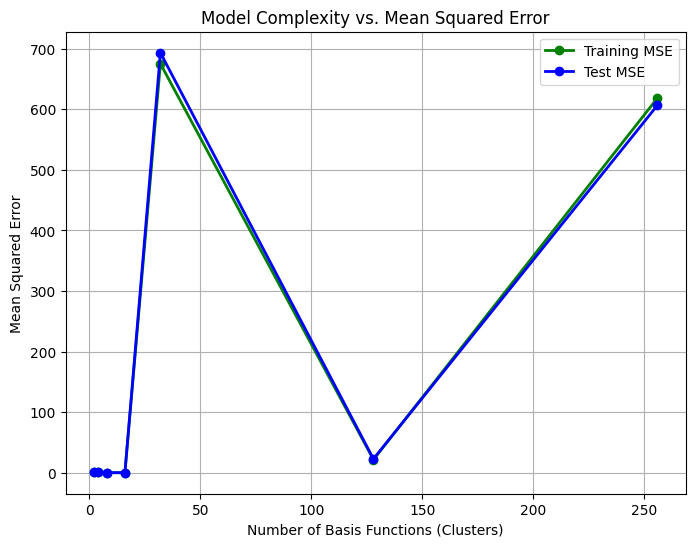

In [ ]:
mse_train_values = []
mse_test_values = []

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Step 1: Divide Data into Training and Test Sets
    np.random.seed(0)  # Set seed for reproducibility
    indices = np.random.permutation(len(x_data))
    train_indices = indices[:int(0.7 * len(x_data))]
    test_indices = indices[int(0.7 * len(x_data)):]

    X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
    y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

    # Step 2: Apply K-means Clustering for Gaussian Basis Functions
    cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

    # Calculate the farthest distance between cluster centers
    farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

    # Calculate width as (farthest distance / sqrt(2))
    width = np.sqrt(farthest_distance) / np.sqrt(2)

    # Compute Gaussian basis functions for training data with the calculated width
    phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

    # Train linear regression model (closed-form solution)
    phi_train_transpose = np.transpose(phi_train)
    weights = np.linalg.inv(phi_train_transpose @ phi_train) @ (phi_train_transpose @ y_train)

    # Compute Gaussian basis functions for test data with the same width
    phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

    # Make predictions for training and test data
    predictions_train = phi_train @ weights
    predictions_test = phi_test @ weights

    # Calculate mean squared error for training and test data
    mse_train = np.mean((y_train - predictions_train) ** 2)
    mse_test = np.mean((y_test - predictions_test) ** 2)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plot MSE values against model complexity (number of clusters) separately for each model complexity with lines connecting points
plt.figure(figsize=(8, 6))
plt.plot(complexity_values, mse_train_values, marker='o', color='green', linestyle='-', linewidth=2, label='Training MSE')
plt.plot(complexity_values, mse_test_values, marker='o', color='blue', linestyle='-', linewidth=2, label='Test MSE')
plt.xlabel('Number of Basis Functions (Clusters)')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs. Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()



#Model Output vs Target Output

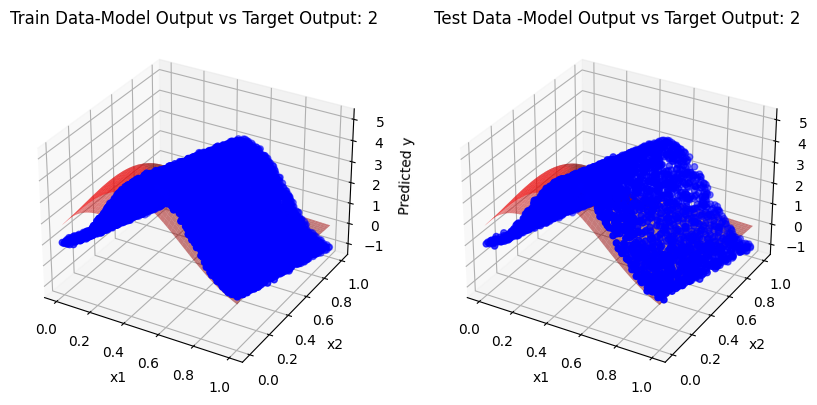

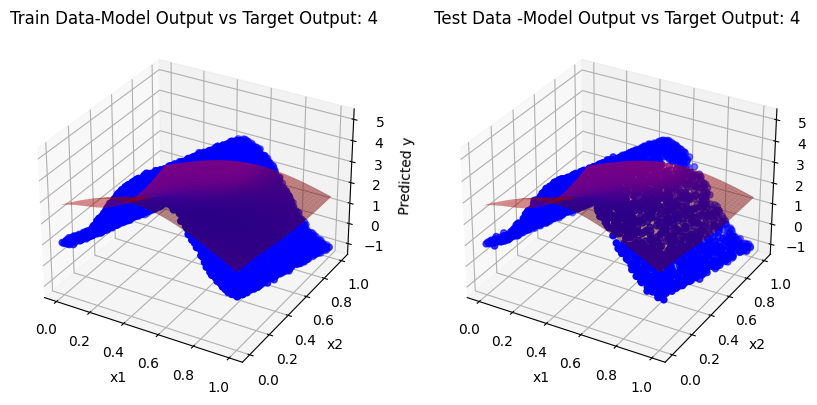

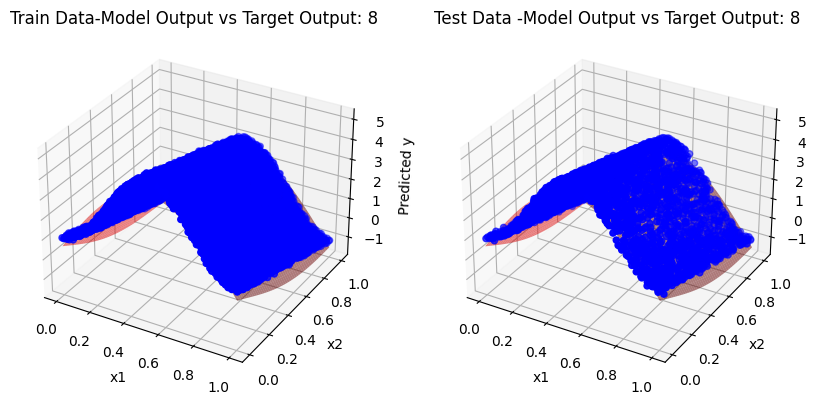

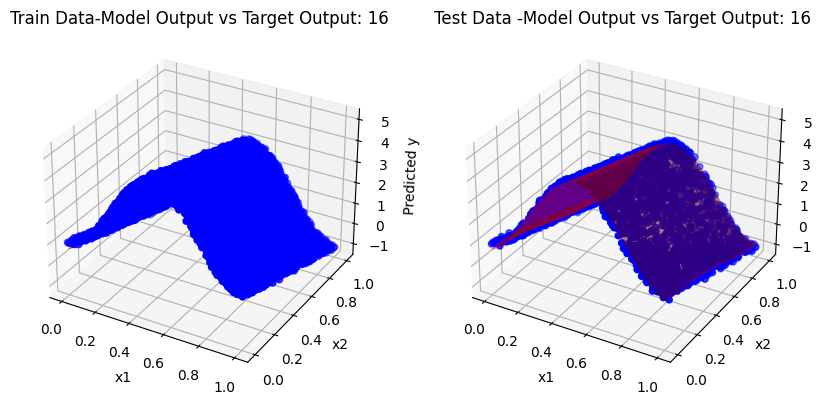

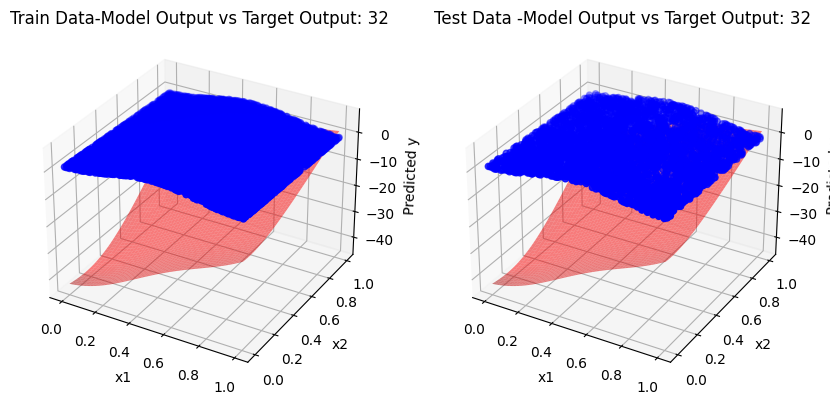

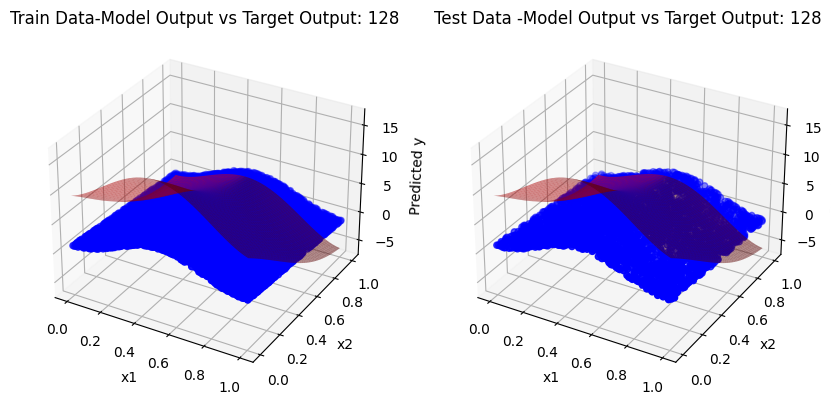

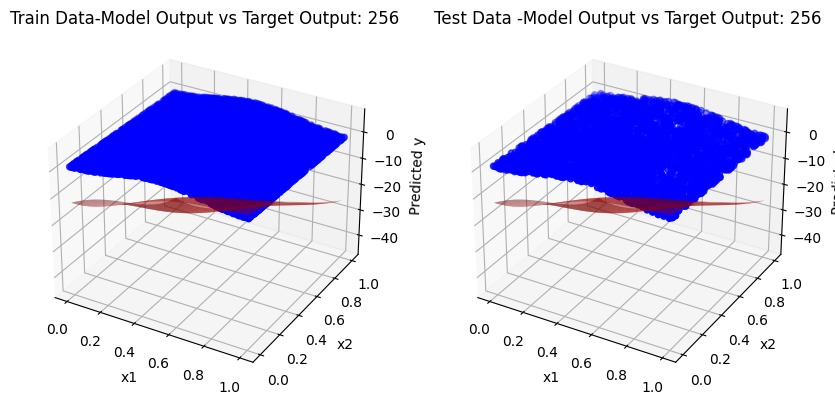

In [ ]:
# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    # Divide Data into Training and Test Sets
    np.random.seed(0)  # Set seed for reproducibility
    indices = np.random.permutation(len(x_data))
    train_indices = indices[:int(0.7 * len(x_data))]
    test_indices = indices[int(0.7 * len(x_data)):]

    X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
    y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

    # Apply K-means Clustering for Gaussian Basis Functions
    cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

    # Calculate width
    farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
    width = np.sqrt(farthest_distance) / np.sqrt(2)

    # Compute Gaussian basis functions for training data
    phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

    # Train linear regression model (closed-form solution)
    phi_train_transpose = np.transpose(phi_train)
    weights = np.linalg.inv(phi_train_transpose @ phi_train) @ (phi_train_transpose @ y_train)

    # Compute Gaussian basis functions for test data
    phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

    # Make predictions for training and test data
    predictions_train = phi_train @ weights
    predictions_test = phi_test @ weights

    # Create meshgrid for 3D surface plot
    x1, x2 = np.meshgrid(np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 50),
                         np.linspace(min(X_test[:, 1]), max(X_test[:, 1]), 50))
    X_meshgrid = np.c_[x1.ravel(), x2.ravel()]
    phi_meshgrid = gaussian_basis_functions(X_meshgrid, cluster_centers, width=width)
    predictions_meshgrid = phi_meshgrid @ weights

    # Plot 3D surface for training data
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(x1, x2, predictions_meshgrid.reshape(x1.shape), color='red', alpha=0.5)
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    ax.set_title(f'Train Data-Model Output vs Target Output: {num_clusters}')

    # Plot 3D surface for test data
    ax = fig.add_subplot(122, projection='3d')
    ax.plot_surface(x1, x2, predictions_meshgrid.reshape(x1.shape), color='red', alpha=0.5)
    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='True data')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Predicted y')
    ax.set_title(f'Test Data -Model Output vs Target Output: {num_clusters}')

    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
num_clusters = 16  # Choose an appropriate number of clusters
alpha = 1  # Regularization parameter

# Step 1: Divide Data into Training and Test Sets
np.random.seed(0)  # Set seed for reproducibility
indices = np.random.permutation(len(x_data))
train_indices = indices[:int(0.7 * len(x_data))]
test_indices = indices[int(0.7 * len(x_data)):]

X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

# Step 2: Apply K-means Clustering for Gaussian Basis Functions
cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

# Calculate the farthest distance between cluster centers
farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

# Calculate width as (farthest distance / sqrt(2))
width = np.sqrt(farthest_distance) / np.sqrt(2)

# Compute Gaussian basis functions for training data with the calculated width
phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

# Apply Ridge regression to obtain weights
identity_matrix = np.identity(phi_train.shape[1])
weights = np.linalg.inv(phi_train.T @ phi_train + alpha * identity_matrix) @ phi_train.T @ y_train

# Compute Gaussian basis functions for all data points with the same width
x1, x2 = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

X_grid = np.column_stack((x1.ravel(), x2.ravel()))
phi_grid = gaussian_basis_functions(X_grid, cluster_centers, width=width)

# Predictions for the entire grid
predictions_grid = phi_grid @ weights
predictions_grid = predictions_grid.reshape(x1.shape)

# Plot the 3D surface for the training data and model predictions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
ax.plot_surface(x1, x2, predictions_grid, color='red', alpha=0.5, label='Predicted surface')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Predicted y')
ax.set_title(f'Training Data and Predicted Surface (Clusters: {num_clusters}, Regularization Parameter: {alpha})')
plt.legend()
plt.show()


#Regularization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Dataset 2 from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/BivariateData/1.csv')

# Extract features and target
x_data = data[['x1', 'x2']]
y_data = data['y']

# Model complexities (Number of basis functions)
complexity_values = [2, 4, 8, 16, 32, 128, 256]
#alpha_values = [1e-10, 1e-15, 1e-18, 1e-20,1e-22]  # Regularization parameter values
alpha_values = [1e-5, 1e-6, 1e-7, 1e-8,1e-9,1e-19]
def kmeans_clustering(X, num_clusters):
    # Randomly initialize cluster centers
    np.random.seed(0)
    cluster_centers = X[np.random.choice(X.shape[0], num_clusters, replace=False)]
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_centers, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_centers, cluster_assignments

def gaussian_basis_functions(X, centers, width=1):
    return np.exp(-np.square(np.linalg.norm(X[:, np.newaxis] - centers, axis=2)) / (2 * width ** 2))

def ridge_regression(phi, y, alpha):
    identity_matrix = np.identity(phi.shape[1])
    weights = np.linalg.inv(phi.T @ phi + alpha * identity_matrix) @ phi.T @ y
    return weights

In [ ]:
#old Alpha values
for num_clusters in complexity_values:
    for alpha in alpha_values:
        # Step 1: Divide Data into Training and Test Sets
        np.random.seed(0)  # Set seed for reproducibility
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        # Step 2: Apply K-means Clustering for Gaussian Basis Functions
        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

        # Calculate the farthest distance between cluster centers
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

        # Calculate width as (farthest distance / sqrt(2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        # Compute Gaussian basis functions for training data with the calculated width
        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

        # Apply Ridge regression to obtain weights
        identity_matrix = np.identity(phi_train.shape[1])
        weights = np.linalg.inv(phi_train.T @ phi_train + alpha * identity_matrix) @ phi_train.T @ y_train

        # Compute Gaussian basis functions for test data with the same width
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        # Make predictions for training and test data
        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        # Plot the 3D approximated function for training data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
        ax.scatter(X_train[:, 0], X_train[:, 1], predictions_train, color='red', label='Predictions')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'Number of Basis Functions (Clusters): {num_clusters}, Regularization Parameter: {alpha}')
        plt.legend()
        plt.show()

        # Plot the 3D approximated function for test data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='True data')
        ax.scatter(X_test[:, 0], X_test[:, 1], predictions_test, color='red', label='Predictions')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'Number of Basis Functions (Clusters): {num_clusters}, Regularization Parameter: {alpha}')
        plt.legend()
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for num_clusters in complexity_values:
    for alpha in alpha_values:
        # Step 1: Divide Data into Training and Test Sets
        np.random.seed(0)  # Set seed for reproducibility
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        # Step 2: Apply K-means Clustering for Gaussian Basis Functions
        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

        # Calculate the farthest distance between cluster centers
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))

        # Calculate width as (farthest distance / sqrt(2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        # Compute Gaussian basis functions for training data with the calculated width
        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

        # Apply Ridge regression to obtain weights
        identity_matrix = np.identity(phi_train.shape[1])
        weights = np.linalg.inv(phi_train.T @ phi_train + alpha * identity_matrix) @ phi_train.T @ y_train

        # Compute Gaussian basis functions for test data with the same width
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        # Make predictions for training and test data
        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        # Plot the 3D approximated function for training data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
        ax.scatter(X_train[:, 0], X_train[:, 1], predictions_train, color='red', label='Predictions')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'training data-Number of Basis Functions (Clusters): {num_clusters}, Regularization Parameter: {alpha}')
        plt.legend()
        plt.show()

        # Plot the 3D approximated function for test data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='True data')
        ax.scatter(X_test[:, 0], X_test[:, 1], predictions_test, color='red', label='Predictions')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'test data-Number of Basis Functions (Clusters): {num_clusters}, Regularization Parameter: {alpha}')
        plt.legend()
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

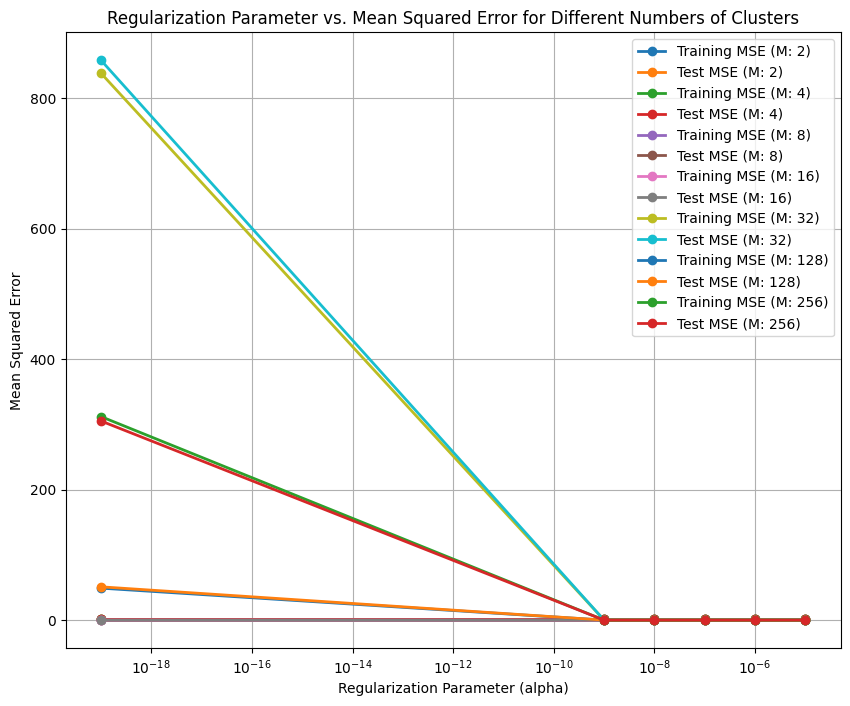

In [ ]:
#alpha_values = [1e-5, 1e-6, 1e-7, 1e-8,1e-9,1e-19]
mse_train_values = []
mse_test_values = []

for num_clusters in complexity_values:
    for alpha in alpha_values:
        np.random.seed(0)
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        weights = ridge_regression(phi_train, y_train, alpha=alpha)

        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        mse_train = np.mean((y_train - predictions_train) ** 2)
        mse_test = np.mean((y_test - predictions_test) ** 2)

        mse_train_values.append(mse_train)
        mse_test_values.append(mse_test)

# Reshape MSE values for plotting
mse_train_values = np.array(mse_train_values).reshape(len(complexity_values), len(alpha_values))
mse_test_values = np.array(mse_test_values).reshape(len(complexity_values), len(alpha_values))

# Plot MSE values against model complexity and regularization parameter
fig, ax = plt.subplots(figsize=(10, 8))
for i, num_clusters in enumerate(complexity_values):
    ax.semilogx(alpha_values, mse_train_values[i], marker='o', linestyle='-', linewidth=2, label=f'Training MSE (M: {num_clusters})')
    ax.semilogx(alpha_values, mse_test_values[i], marker='o', linestyle='-', linewidth=2, label=f'Test MSE (M: {num_clusters})')

ax.set_xlabel('Regularization Parameter (alpha)')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Regularization Parameter vs. Mean Squared Error for Different Numbers of Clusters')
ax.legend()
ax.grid(True)
plt.show()


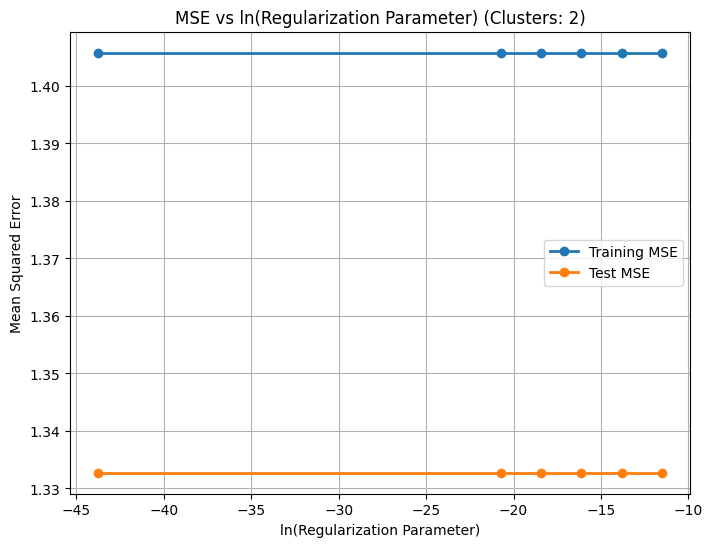

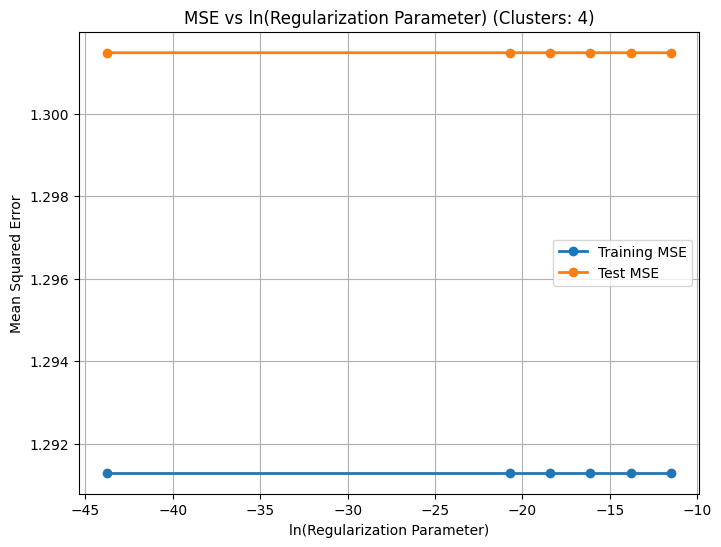

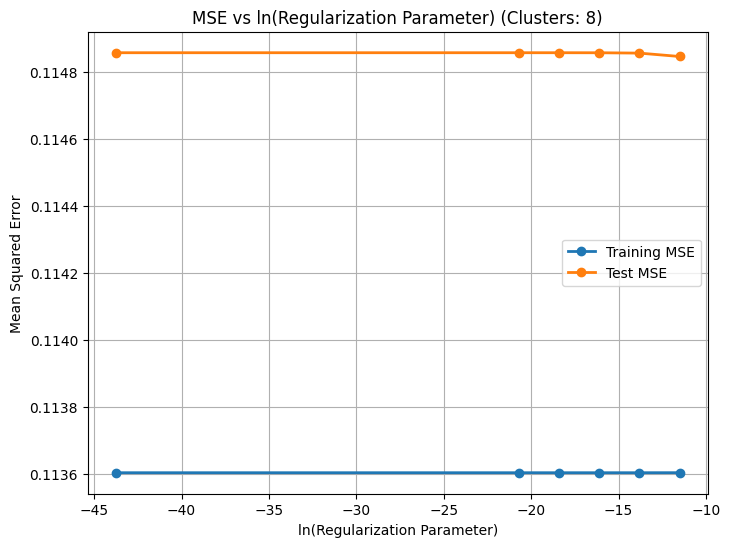

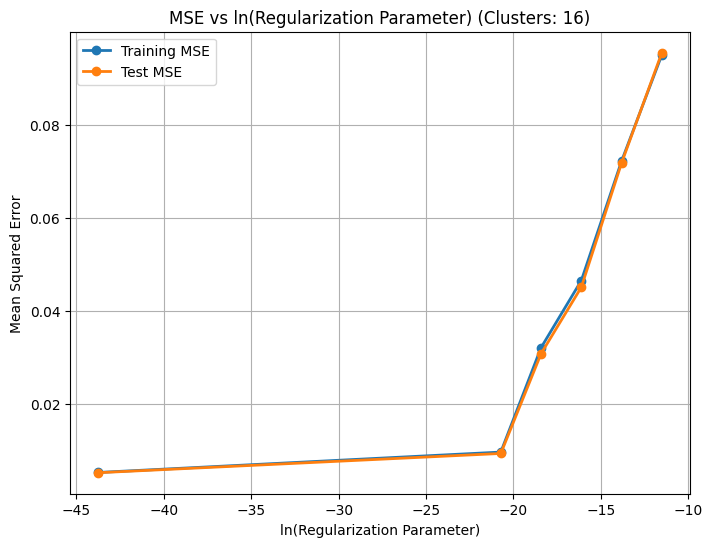

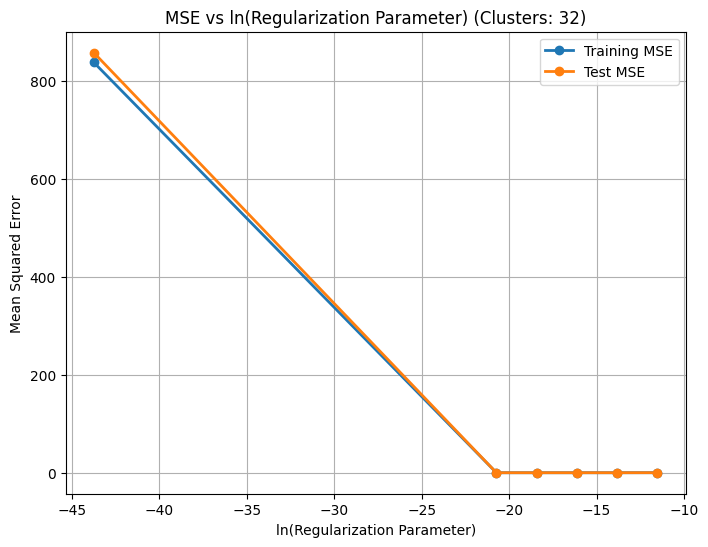

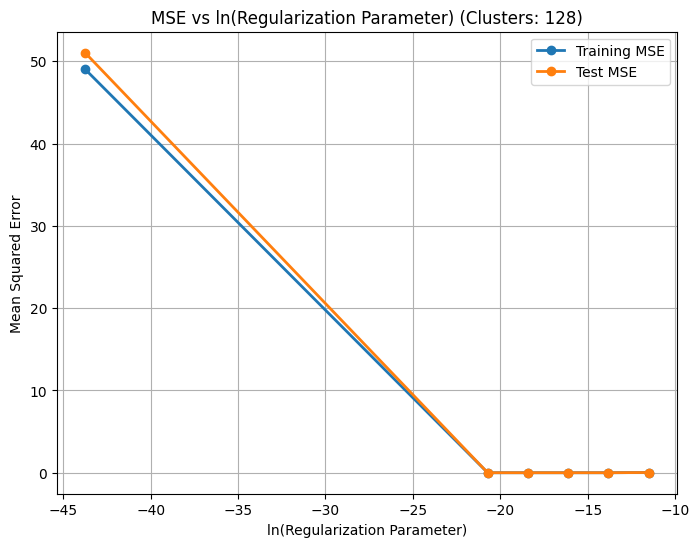

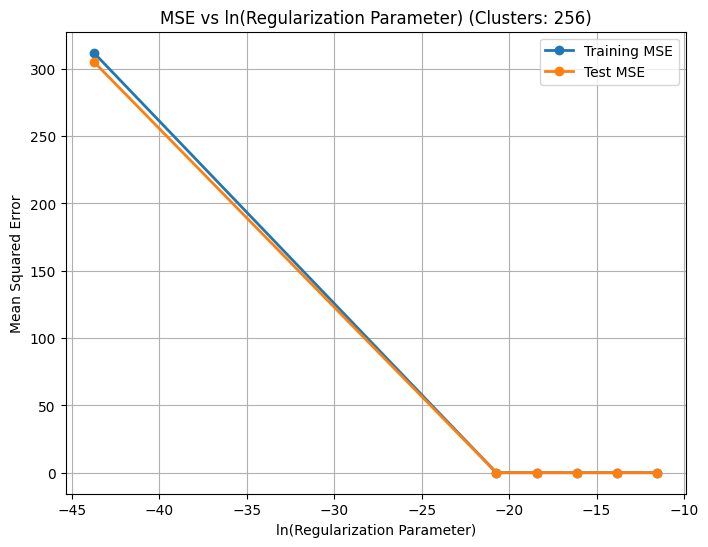

In [ ]:
#alpha_values = [1e-5, 1e-6, 1e-7, 1e-8,1e-9,1e-19]
mse_train_values = []
mse_test_values = []

for num_clusters in complexity_values:
    mse_train_cluster = []
    mse_test_cluster = []
    for alpha in alpha_values:
        np.random.seed(0)
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        weights = ridge_regression(phi_train, y_train, alpha=alpha)

        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        mse_train = np.mean((y_train - predictions_train) ** 2)
        mse_test = np.mean((y_test - predictions_test) ** 2)

        mse_train_cluster.append(mse_train)
        mse_test_cluster.append(mse_test)

    mse_train_values.append(mse_train_cluster)
    mse_test_values.append(mse_test_cluster)

# Plot MSE values against ln(Regularization Parameter) for different numbers of clusters
for i, num_clusters in enumerate(complexity_values):
    plt.figure(figsize=(8, 6))
    ln_alpha_values = np.log(alpha_values)  # Take natural logarithm of alpha values
    plt.plot(ln_alpha_values, mse_train_values[i], marker='o', linestyle='-', linewidth=2, label='Training MSE')
    plt.plot(ln_alpha_values, mse_test_values[i], marker='o', linestyle='-', linewidth=2, label='Test MSE')
    plt.xlabel('ln(Regularization Parameter)')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE vs ln(Regularization Parameter) (Clusters: {num_clusters})')
    plt.legend()
    plt.grid(True)
    plt.show()


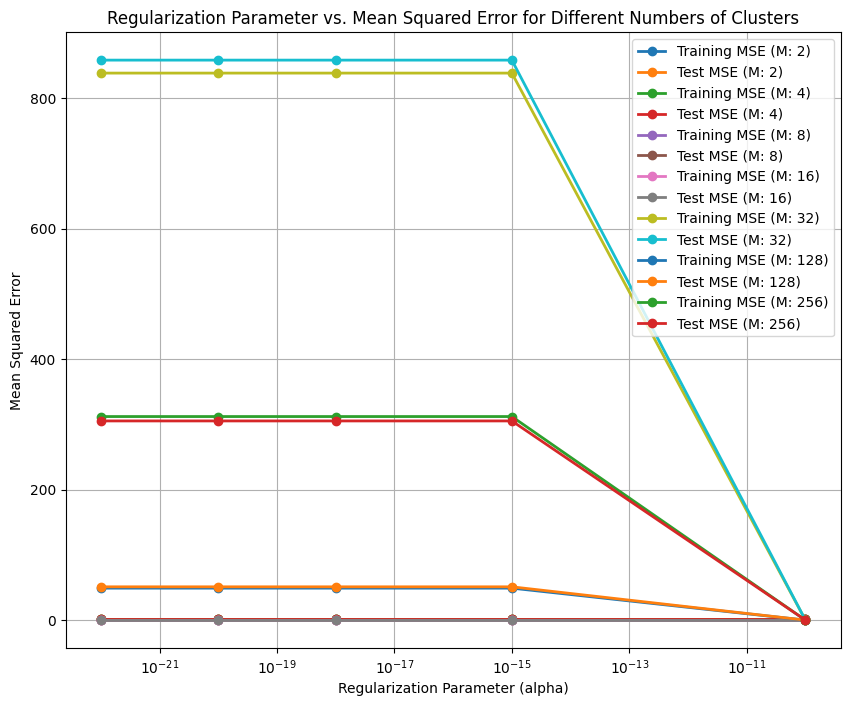

In [ ]:
#old
mse_train_values = []
mse_test_values = []

for num_clusters in complexity_values:
    for alpha in alpha_values:
        np.random.seed(0)
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        weights = ridge_regression(phi_train, y_train, alpha=alpha)

        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        mse_train = np.mean((y_train - predictions_train) ** 2)
        mse_test = np.mean((y_test - predictions_test) ** 2)

        mse_train_values.append(mse_train)
        mse_test_values.append(mse_test)

# Reshape MSE values for plotting
mse_train_values = np.array(mse_train_values).reshape(len(complexity_values), len(alpha_values))
mse_test_values = np.array(mse_test_values).reshape(len(complexity_values), len(alpha_values))

# Plot MSE values against model complexity and regularization parameter
fig, ax = plt.subplots(figsize=(10, 8))
for i, num_clusters in enumerate(complexity_values):
    ax.semilogx(alpha_values, mse_train_values[i], marker='o', linestyle='-', linewidth=2, label=f'Training MSE (M: {num_clusters})')
    ax.semilogx(alpha_values, mse_test_values[i], marker='o', linestyle='-', linewidth=2, label=f'Test MSE (M: {num_clusters})')

ax.set_xlabel('Regularization Parameter (alpha)')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Regularization Parameter vs. Mean Squared Error for Different Numbers of Clusters')
ax.legend()
ax.grid(True)
plt.show()


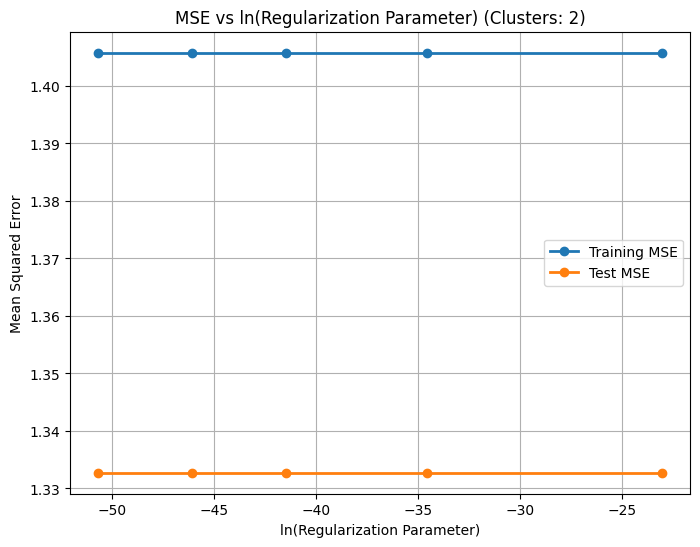

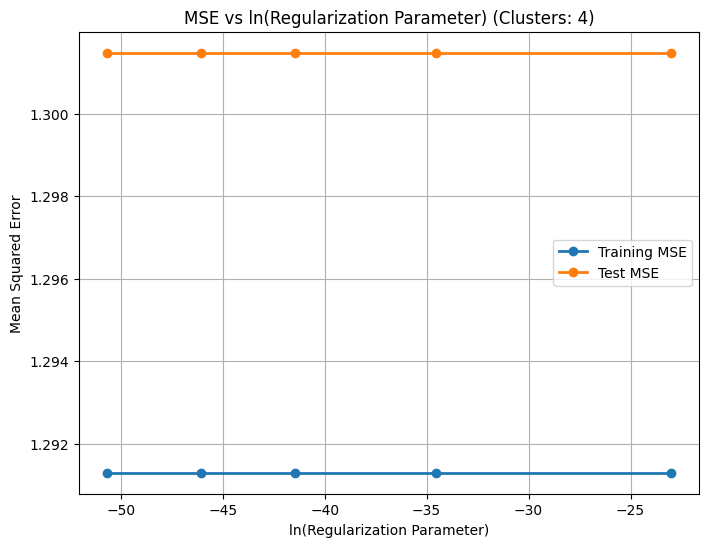

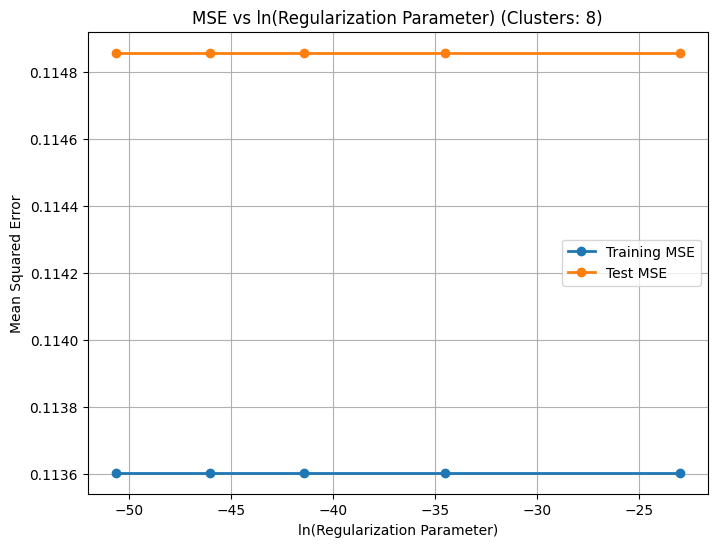

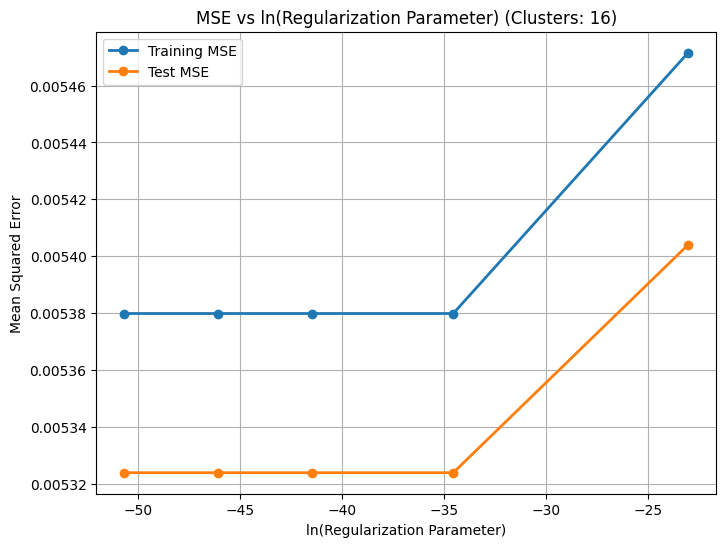

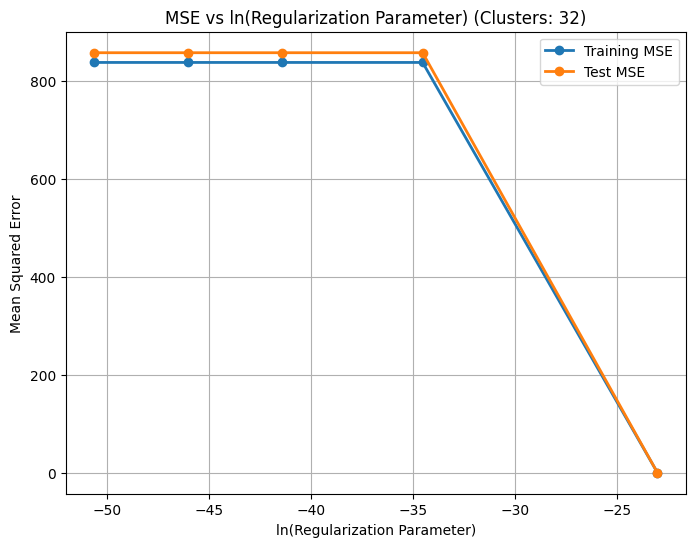

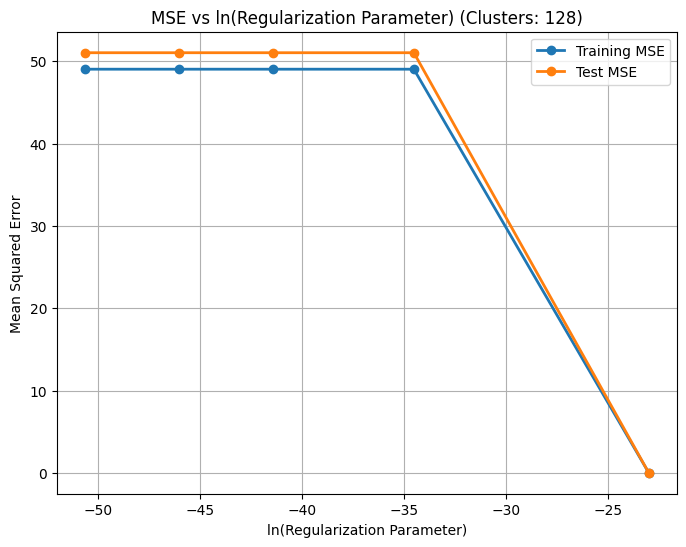

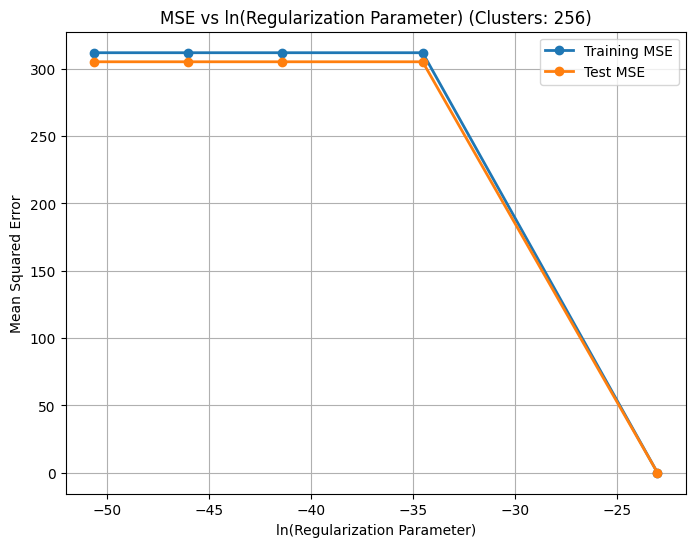

In [ ]:
#old
mse_train_values = []
mse_test_values = []

for num_clusters in complexity_values:
    mse_train_cluster = []
    mse_test_cluster = []
    for alpha in alpha_values:
        np.random.seed(0)
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        weights = ridge_regression(phi_train, y_train, alpha=alpha)

        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        mse_train = np.mean((y_train - predictions_train) ** 2)
        mse_test = np.mean((y_test - predictions_test) ** 2)

        mse_train_cluster.append(mse_train)
        mse_test_cluster.append(mse_test)

    mse_train_values.append(mse_train_cluster)
    mse_test_values.append(mse_test_cluster)

# Plot MSE values against ln(Regularization Parameter) for different numbers of clusters
for i, num_clusters in enumerate(complexity_values):
    plt.figure(figsize=(8, 6))
    ln_alpha_values = np.log(alpha_values)  # Take natural logarithm of alpha values
    plt.plot(ln_alpha_values, mse_train_values[i], marker='o', linestyle='-', linewidth=2, label='Training MSE')
    plt.plot(ln_alpha_values, mse_test_values[i], marker='o', linestyle='-', linewidth=2, label='Test MSE')
    plt.xlabel('ln(Regularization Parameter)')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE vs ln(Regularization Parameter) (Clusters: {num_clusters})')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#alpha_values = [1e-5, 1e-6, 1e-7, 1e-8,1e-9,1e-19]
# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    for alpha in alpha_values:
        # Divide Data into Training and Test Sets
        np.random.seed(0)  # Set seed for reproducibility
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        # Apply K-means Clustering for Gaussian Basis Functions
        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

        # Calculate width
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        # Compute Gaussian basis functions for training data
        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

        # Apply Ridge regression to obtain weights with the specified alpha value
        identity_matrix = np.identity(phi_train.shape[1])
        weights = np.linalg.inv(phi_train.T @ phi_train + alpha * identity_matrix) @ phi_train.T @ y_train

        # Compute Gaussian basis functions for test data
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        # Make predictions for training and test data
        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        # Create meshgrid for 3D surface plot
        x1, x2 = np.meshgrid(np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 50),
                             np.linspace(min(X_test[:, 1]), max(X_test[:, 1]), 50))
        X_meshgrid = np.c_[x1.ravel(), x2.ravel()]
        phi_meshgrid = gaussian_basis_functions(X_meshgrid, cluster_centers, width=width)
        predictions_meshgrid = phi_meshgrid @ weights

        # Plot 3D surface for training data
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(121, projection='3d')
        ax.plot_surface(x1, x2, predictions_meshgrid.reshape(x1.shape), color='red', alpha=0.5)
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'Train Data - Model Output vs Target Output: {num_clusters}, Alpha: {alpha}')

        # Plot 3D surface for test data
        ax = fig.add_subplot(122, projection='3d')
        ax.plot_surface(x1, x2, predictions_meshgrid.reshape(x1.shape), color='red', alpha=0.5)
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='True data')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'Test Data - Model Output vs Target Output: {num_clusters}, Alpha: {alpha}')

        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#old

# Iterate through different numbers of clusters (complexity values)
for num_clusters in complexity_values:
    for alpha in alpha_values:
        # Divide Data into Training and Test Sets
        np.random.seed(0)  # Set seed for reproducibility
        indices = np.random.permutation(len(x_data))
        train_indices = indices[:int(0.7 * len(x_data))]
        test_indices = indices[int(0.7 * len(x_data)):]

        X_train, X_test = x_data.values[train_indices], x_data.values[test_indices]
        y_train, y_test = y_data.values[train_indices], y_data.values[test_indices]

        # Apply K-means Clustering for Gaussian Basis Functions
        cluster_centers, cluster_assignments = kmeans_clustering(X_train, num_clusters)

        # Calculate width
        farthest_distance = np.max(np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2))
        width = np.sqrt(farthest_distance) / np.sqrt(2)

        # Compute Gaussian basis functions for training data
        phi_train = gaussian_basis_functions(X_train, cluster_centers, width=width)

        # Apply Ridge regression to obtain weights with the specified alpha value
        identity_matrix = np.identity(phi_train.shape[1])
        weights = np.linalg.inv(phi_train.T @ phi_train + alpha * identity_matrix) @ phi_train.T @ y_train

        # Compute Gaussian basis functions for test data
        phi_test = gaussian_basis_functions(X_test, cluster_centers, width=width)

        # Make predictions for training and test data
        predictions_train = phi_train @ weights
        predictions_test = phi_test @ weights

        # Create meshgrid for 3D surface plot
        x1, x2 = np.meshgrid(np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 50),
                             np.linspace(min(X_test[:, 1]), max(X_test[:, 1]), 50))
        X_meshgrid = np.c_[x1.ravel(), x2.ravel()]
        phi_meshgrid = gaussian_basis_functions(X_meshgrid, cluster_centers, width=width)
        predictions_meshgrid = phi_meshgrid @ weights

        # Plot 3D surface for training data
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(121, projection='3d')
        ax.plot_surface(x1, x2, predictions_meshgrid.reshape(x1.shape), color='red', alpha=0.5)
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='True data')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'Train Data - Model Output vs Target Output: {num_clusters}, Alpha: {alpha}')

        # Plot 3D surface for test data
        ax = fig.add_subplot(122, projection='3d')
        ax.plot_surface(x1, x2, predictions_meshgrid.reshape(x1.shape), color='red', alpha=0.5)
        ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='True data')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('Predicted y')
        ax.set_title(f'Test Data - Model Output vs Target Output: {num_clusters}, Alpha: {alpha}')

        plt.show()


Output hidden; open in https://colab.research.google.com to view.

#S=sqrt(2M)